# calculate ACC and NMAE within each LME along the vertical direction

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import numpy as np
from matplotlib import cm,colors,gridspec
import os

In [2]:
USER = os.environ['USER']

## FOSI hindcast 

In [3]:
var = 'Phi'

In [4]:
datadir = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{datadir}/DPLE-FOSI_hindcast_{var}_Eo_space_horizontal_mean_LME_1948-2017_yearly.nc'
ds_hind = xr.open_dataset(filename)
ds_hind

<xarray.Dataset>
Dimensions:  (lme: 11, time: 70, z_t: 35)
Coordinates:
  * lme      (lme) int64 1 2 3 4 5 6 7 8 9 10 65
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 60 61 62 63 64 65 66 67 68 69
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.277e+04 5.794e+04
Data variables: (12/13)
    Phi_0    (lme, time, z_t) float64 ...
    Phi_1    (lme, time, z_t) float64 ...
    Phi_2    (lme, time, z_t) float64 ...
    Phi_3    (lme, time, z_t) float64 ...
    Phi_4    (lme, time, z_t) float64 ...
    Phi_5    (lme, time, z_t) float64 ...
    ...       ...
    Phi_7    (lme, time, z_t) float64 ...
    Phi_8    (lme, time, z_t) float64 ...
    Phi_9    (lme, time, z_t) float64 ...
    Phi_10   (lme, time, z_t) float64 ...
    Phi_11   (lme, time, z_t) float64 ...
    Phi_12   (lme, time, z_t) float64 ...

## plot temporal STD values in the vertical direction for each LME

In [5]:
path = '/glade/campaign/cesm/collections/CESM1-DPLE/ocn/proc/tseries/monthly/O2'
filename = f'{path}/b.e11.BDP.f09_g16.2017-11.040.pop.h.O2.201711-202712.nc'
dset = xr.open_dataset(filename)
z_u = -dset['z_w_top'][:].values/1e2 # m
z_d = -dset['z_w_bot'][:].values/1e2 # m
z_t = -dset['z_t'][:].values/1e2
dz = dset['dz'][:].values/1e2
dset.close()

In [6]:
from matplotlib import rc, gridspec
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
boxna = ['01-EBS','02-GoA','03-CC','04-GoC','05-GoM','06-SEUS','07-NEUS','08-SS','09-LN','10-IPH','11-AI']
boxnb = [1,2,3,4,5,6,7,8,9,10,65]
cols = ['gold','orangered','orangered','dodgerblue','gold','dodgerblue','orangered','dodgerblue','gold','orangered','dodgerblue']
hats = ['//','..','..','\\','//','\\','..','\\','//','..','\\']

In [7]:
nphi = 13
STD_box = np.zeros([nphi,len(boxnb),35])
MEAN_box = STD_box.copy()
for ii in range(len(boxnb)):
    for cc in range(nphi):
        tempp = ds_hind[f'{var}_{cc}'].isel(lme=ii,time=range(6,70)).values
        tempp = tempp / 1.
        STD_box[cc,ii,:] = np.std(tempp,axis=0)
        MEAN_box[cc,ii,:] = np.mean(tempp,axis=0)

In [8]:
Up = MEAN_box + 3*STD_box
Dn = MEAN_box - 3*STD_box
maskup = MEAN_box != MEAN_box
maskdn = maskup.copy()
maskmd = maskup.copy()
for ii in range(len(boxnb)):
    for cc in range(nphi):
        for pp in range(35):
            maskup[cc,ii,pp] = Up[cc,ii,pp]>=1
            maskmd[cc,ii,pp] = MEAN_box[cc,ii,pp]>=1
            maskdn[cc,ii,pp] = Dn[cc,ii,pp]>=1

In [9]:
maskjj = ~(~maskup+maskdn)

In [10]:
def vertical_ranges(maskup,cc,ii):
    tmp = []
    for pp in range(35):
        if maskup[cc,ii,pp] == True:
            tmp.append(z_u[pp])
            tmp.append(z_d[pp])
    # remove duplicate values
    tmppp = []
    if len(tmp) != 0:
        tmpp = []
        [tmpp.append(x) for x in tmp if x not in tmpp]
        #print(tmpp)
        for kk in range(len(tmpp)):
            if tmp.count(tmpp[kk]) == 1:
                tmppp.append(tmpp[kk])
    if len(tmppp) == 0:
        tmppp = [0,0]
    return tmppp

1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
65 10


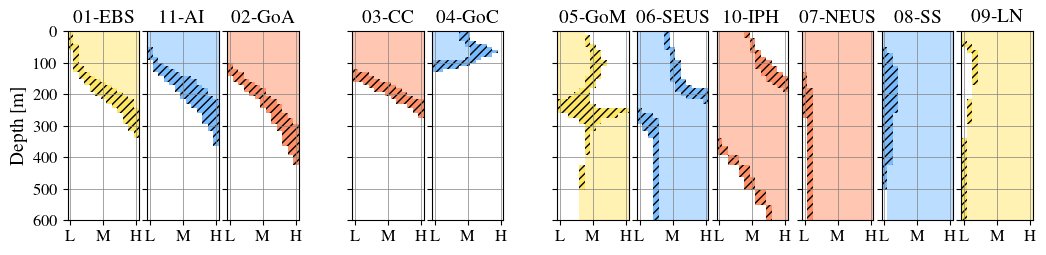

In [11]:
fig = plt.figure(figsize=[11, 3])
##
newbox = list(zip(boxnb, range(len(boxnb))))

boxloc = np.ones([len(boxnb),2])
boxloc[0,0],boxloc[10,0],boxloc[1,0],boxloc[6,0],boxloc[7,0],boxloc[8,0] = [0.083,0.1555,0.228,0.7505,0.823,0.8955]
boxloc[0,1],boxloc[10,1],boxloc[1,1],boxloc[6,1],boxloc[7,1],boxloc[8,1] = 0.17*np.ones(6)
boxloc[2,0],boxloc[3,0],boxloc[4,0],boxloc[5,0],boxloc[9,0] = [0.34175,0.41425,0.528,0.6005,0.673] 
boxloc[2,1],boxloc[3,1],boxloc[4,1],boxloc[5,1],boxloc[9,1] = 0.17*np.ones(5)
#
for box, ii in newbox:
    print(box,ii)
    ax = fig.add_axes([boxloc[ii][0],boxloc[ii][1],0.065,0.21*3])
    for cc in range(nphi):
        tmpjj = vertical_ranges(maskjj,cc,ii)
        tmpdn = vertical_ranges(maskdn,cc,ii)
        #
        ax.bar(cc+.5,tmpjj[1]-tmpjj[0],bottom=tmpjj[0],width=1.,alpha=0.6,hatch='////',color=cols[ii])
        if len(tmpjj) > 2:
            ax.bar(cc+.5,tmpjj[3]-tmpjj[2],bottom=tmpjj[2],width=1.,alpha=0.6,hatch='////',color=cols[ii])
        elif len(tmpjj) > 4:
            ax.bar(cc+.5,tmpjj[5]-tmpjj[4],bottom=tmpjj[4],width=1.,alpha=0.6,hatch='////',color=cols[ii])
        #
        ax.bar(cc+.5,tmpdn[1]-tmpdn[0],bottom=tmpdn[0],width=1.,alpha=0.3,color=cols[ii])
        if len(tmpdn) > 2:
            ax.bar(cc+.5,tmpdn[3]-tmpdn[2],bottom=tmpdn[2],width=1.,alpha=0.3,color=cols[ii])
        elif len(tmpdn) > 4:
            ax.bar(cc+.5,tmpdn[5]-tmpdn[4],bottom=tmpdn[4],width=1.,alpha=0.3,color=cols[ii])
    #
    for kk in np.arange(0.5,13,6):
        ax.plot([kk,kk],[-600,0],lw=0.5,color='gray')
    for kk in range(-500,0,100):
        ax.plot([0,13],[kk,kk],lw=0.5,color='gray')
    #
    ax.set_yticks(np.arange(-600, 1, 100))
    if box in [1]:
        ax.set_ylabel('Depth [m]', fontsize=14, fontweight='bold')
        ax.set_yticklabels([str(abs(dd)) for dd in np.arange(-600, 1, 100)],fontsize=12)
    else:
        ax.set_yticklabels('')
    ax.set_xticks(np.arange(0.5, 13, 6))
    ax.set_xticklabels(['L','M','H'],fontsize=12,rotation=0)    
    ax.set_xlim(0, 13)
    ax.set_ylim(-600, 0)
    ax.set_title(boxna[ii], fontsize=14, fontweight='bold')
#
output = f'/glade/scratch/{USER}/DPLE-plots'
outfile = f'{output}/LME_box01-11_FOSI_hindcast_STD_{var}_Eo_space_vertical_distribution.png'
plt.savefig(outfile, dpi=400, transparent=True)
plt.show()